In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lagrange_basis.second_sine as ssbase

In [11]:
# mesh size
mesh_size = 50
scale = 5
verbose = False

mesh = ssbase.mesh_points(mesh_size)
if(verbose):
  print("Roots:\n",mesh)

# using Laguerre polynomials with \alpha = 0
lambdas = ssbase.lambdas(mesh_size)
if(verbose):
  print("Lambdas: \n", lambdas)

  print("Scaled mesh:\n",scale*mesh)

In [3]:
# plotting vars
xplot = 0.02*(np.asarray(range(0,1000))) + 1e-6

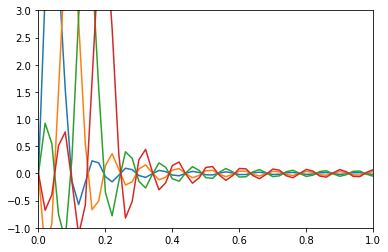

In [4]:
# check basis function
plt.plot(xplot,ssbase.basis_func(xplot,0,mesh))
plt.plot(xplot,ssbase.basis_func(xplot,1,mesh))
plt.plot(xplot,ssbase.basis_func(xplot,2,mesh))
plt.plot(xplot,ssbase.basis_func(xplot,3,mesh))
plt.axis([0, 1, -1.0, 3.0])
plt.show()

In [5]:
def potential_hosc_cfb(mesh, l):
  return 0.5*np.multiply(mesh, mesh) + 0.5*l*(l + 1)/np.multiply(mesh, mesh)

def hamiltonian(angmom, mesh, scale, kinetic, potential):
  msize = mesh.size
  
  ham = np.zeros([msize, msize])
  for row in range(0,msize):
    for col in range(0, msize):
      ham[row, col] = -0.5*kinetic(row, col, mesh)/np.power(scale,2)
      if(row == col):
        ham[row, col] = ham[row, col] + potential(scale*mesh[row], angmom)
  
  return ham

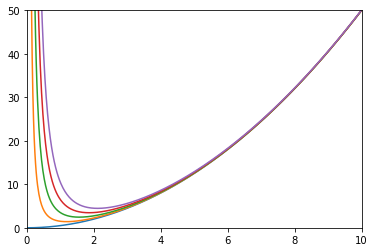

In [6]:
# check potential
plt.figure(1)
for amom in range(0,5):
  pot = potential_hosc_cfb(xplot, amom)
  plt.plot(xplot,pot)
plt.axis([0, 10.0, 0, 50.0])
plt.show()

Angular momentum:  0 
Eigenvalues:
 [   1.5           3.49999869    5.49989084    7.49653658    9.45209761
   11.25680122   13.1910365    15.69792757   18.73023107   22.21047635
   26.11071463   30.41984402   35.13253185   40.24584789   45.75803116
   51.66795502   57.9748645    64.67823516   71.77769192   79.27295996
   87.16383371   95.45015662  104.13180754  113.20869136  122.68073239
  132.54786963  142.81005332  153.46724226  164.51940193  175.9665029
  187.80851957  200.04542916  212.67721074  225.70384435  239.12531001
  252.94158661  267.1526504   281.75847296  296.75901803  312.15423651
  327.94405809  344.12837635  360.70702074  377.67970022  395.04587998
  412.80448128  430.95303928  449.48480502  468.37492668  487.47537662]


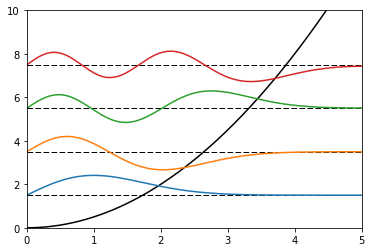

Angular momentum:  1 
Eigenvalues:
 [   2.49990946    4.49976126    6.49898625    8.48605444   10.37831013
   12.16682895   14.35992843   17.13549594   20.39123209   24.07837558
   28.179082     32.68540114   37.59311255   42.89967713   48.60341276
   54.70310847   61.19782225   68.08676502   75.36922868   83.0445376
   91.11201312   99.57094507  108.42056646  117.66002925  127.2883791
  137.30452805  147.70722353  158.495013    169.66620281  181.21881098
  193.15051323  205.45858358  218.13983147  231.19054259  244.60643335
  258.38264164  272.51378357  286.99412916  301.81795356  316.98013966
  332.47705226  348.30765565  364.47462372  380.98511574  397.85061182
  415.08565827  432.7048856   450.71845512  469.11506247  487.76928298]


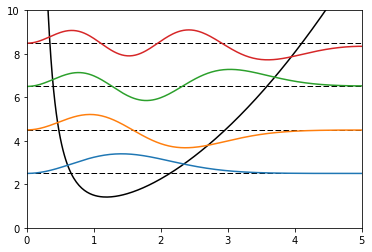

Angular momentum:  2 
Eigenvalues:
 [   3.49999941    5.49992861    7.49733739    9.45923586   11.27230583
   13.18004133   15.65751251   18.67221853   22.14073724   26.03243217
   30.33505278   35.0426444    40.15188993   45.66076957   51.56797579
   57.87262341   64.57409205   71.67193464   79.16582144   87.05550443
   95.34079381  104.02154209  113.09763313  122.56897422  132.43549055
  142.69712097  153.35381492  164.40553008  175.85223047  187.69388502
  199.9304663   212.56194946  225.5883112   239.00952871  252.8255785
  267.03643483  281.64206763  296.64243939  312.03750017  327.82717935
  344.01137092  360.58990595  377.56249729  394.92861859  412.68721046
  430.83585731  449.36796265  468.25933804  487.36605012  503.39593785]


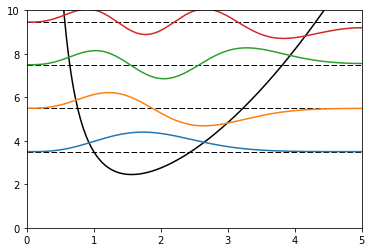

In [12]:
# diagonalization
for amom in range(0,3):
  evals, evecs = np.linalg.eig(hamiltonian(amom, mesh, scale, ssbase.me_ddx_exact, potential_hosc_cfb))
  
  idx = evals.argsort()
  evals = evals[idx]
  evecs = evecs[:,idx]
  
  for state in range(0,evals.size):
    if(evecs[0,state] < 0):
      evecs[:,state] = -1*evecs[:,state]

  print("Angular momentum: ",amom,"\nEigenvalues:\n",evals)
  plt.plot(xplot, potential_hosc_cfb(xplot, amom), 'k-')
  plt.axis([0, 5.0, 0, 10.0])
  for state in range(0,4):
    plt.plot([0, 5.0],[evals[state], evals[state]],'k--',linewidth = 1)
    plt.plot(xplot,evals[state] + ssbase.wave_function(evecs[:,state], xplot, mesh, scale))
  plt.show()